In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ee
import geemap
import logging
import multiprocessing
import rasterio
from osgeo import gdal
from geojson import Polygon
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import geopandas as gpd
import pandas as pd
import rasterio
import skimage
import os

In [4]:
os.chdir("C:/Users/Tim/.keras/datasets/greenspace_transfer/ohsome2label")
os.listdir()

['config.yaml', 'example_result', 'schema.yaml']

In [12]:
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml vector
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml label
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml image
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml visualize -n 20

Download OSM historical data into dir:
C:\Users\Tim\.keras\datasets\greenspace_transfer\ohsome2label\example_result\other\raw



100%|##########| 7/7 [00:30<00:00,  4.30s/it]


Tile the OSM data into given zoom level: 16



0it [00:00, ?it/s]
31it [00:00, 298.85it/s]
61it [00:00, 297.32it/s]
87it [00:00, 279.45it/s]
108it [00:00, 250.50it/s]
138it [00:00, 262.79it/s]
166it [00:00, 266.89it/s]
196it [00:00, 274.62it/s]
223it [00:00, 271.80it/s]
249it [00:00, 260.67it/s]
275it [00:01, 251.37it/s]
300it [00:01, 248.43it/s]
325it [00:01, 244.02it/s]
351it [00:01, 247.82it/s]
379it [00:01, 255.91it/s]
405it [00:01, 251.09it/s]
432it [00:01, 254.96it/s]
459it [00:01, 257.74it/s]
487it [00:01, 262.48it/s]
514it [00:01, 261.36it/s]
543it [00:02, 266.46it/s]
570it [00:02, 266.98it/s]
598it [00:02, 270.16it/s]
626it [00:02, 272.97it/s]
654it [00:02, 267.09it/s]
682it [00:02, 268.43it/s]
709it [00:02, 265.65it/s]
741it [00:02, 277.66it/s]
769it [00:02, 275.89it/s]
803it [00:03, 290.90it/s]
837it [00:03, 303.15it/s]
870it [00:03, 309.70it/s]
902it [00:03, 301.83it/s]
933it [00:03, 293.77it/s]
963it [00:03, 292.07it/s]
1000it [00:03, 309.35it/s]
1032it [00:03, 309.66it/s]
1064it [00:03, 310.79it/s]
1096it [00:03, 309

Start download satellite image!



100%|##########| 2733/2733 [08:29<00:00,  5.37it/s]


start visualize 10 pictures!
10
Visualization mode: combined the satellite image with OpenStreetMap features.


In [15]:
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml visualize -n 30

start visualize 30 pictures!
30
Visualization mode: combined the satellite image with OpenStreetMap features.


In [ ]:
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml vector
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml label
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml image
!ohsome2label --config ./config_bing.yaml --schema ./schema.yaml visualize -n 10

In [6]:
DATA_PATH = "C:/Users/Tim/.keras/datasets/greenspace_transfer/"
IMG_PATH = DATA_PATH + "S2A_MSIL1C_20220508T100601_N0400_R022_T32UQD_20220508T121548.SAFE/GRANULE/L1C_T32UQD_A035912_20220508T101446/IMG_DATA/"

In [7]:
13.241272,52.460193,13.550262,52.598877
poly = Polygon([[(13.24, 52.46), (13.24, 52.59), (13.55, 52.59), (13.55, 52.46), (13.24, 52.46)]])
poly

{"coordinates": [[[13.24, 52.46], [13.24, 52.59], [13.55, 52.59], [13.55, 52.46], [13.24, 52.46]]], "type": "Polygon"}

In [8]:
api = SentinelAPI('tim-heu', 'sSV@Cw7ieP_C3Cq', 'https://apihub.copernicus.eu/apihub')

In [9]:
footprint = geojson_to_wkt(poly)
products = api.query(footprint,
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0, 5),
                     limit=1)
products_df = api.to_dataframe(products)
products_df

,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,generationdate,beginposition,endposition,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid
985eb797-cc65-4f93-8528-3db9dbf3b9f3,S2A_MSIL1C_20220610T101611_N0400_R065_T32UQD_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-06-10T10:16:11.024Z, Instrument: MS...",false,2022-06-10 10:16:11.024,2022-06-10 14:00:49,2022-06-10 10:16:11.024,2022-06-10 10:16:11.024,...,GS2A_20220610T101611_036384_N04.00,S2MSI1C,2015-028A,ASCENDING,Sentinel-2A,Level-1C,S2A_OPER_MSI_L1C_DS_ATOS_20220610T140049_S2022...,S2A_OPER_MSI_L1C_TL_ATOS_20220610T140049_A0363...,S2A_MSIL1C_20220610T101611_N0400_R065_T32UQD_2...,985eb797-cc65-4f93-8528-3db9dbf3b9f3


In [10]:
products_df.iloc[0,1]

"https://apihub.copernicus.eu/apihub/odata/v1/Products('985eb797-cc65-4f93-8528-3db9dbf3b9f3')/$value"

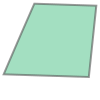

In [10]:
geojson_query = api.to_geodataframe(products)
geojson_query.iloc[0,-1]

In [11]:
api.download_all(products, directory_path)

MD5 checksumming:   0%|          | 0.00/554M [00:00<?, ?B/s]

ResultTuple(downloaded={'eef1953a-8670-4371-a361-1b939d50d684': {'id': 'eef1953a-8670-4371-a361-1b939d50d684', 'title': 'S2A_MSIL1C_20220508T100601_N0400_R022_T32UQD_20220508T121548', 'size': 553699335, 'md5': '35e661b54eb20ec5985e3f3018e4f425', 'date': datetime.datetime(2022, 5, 8, 10, 6, 1, 24000), 'footprint': 'POLYGON((12.356694503401457 52.21265177964306,12.38716042952412 52.284309048046765,12.449744175866414 52.430051251871056,12.51259790644128 52.57577587470773,12.575639722130353 52.7214434886387,12.628139742910207 52.842513464612026,12.638796805730108 52.8669069791488,12.702594560315864 53.01245974958843,12.724581031393855 53.062668191079446,12.766683638124816 53.15816395815714,12.779374031580657 53.186830889614065,13.634183017449221 53.1594219676414,13.531032170485291 52.17548471916956,12.356694503401457 52.21265177964306))', 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('eef1953a-8670-4371-a361-1b939d50d684')/$value", 'Online': True, 'Creation Date': datetime.

In [17]:
img_path = DATA_PATH+"S2A_MSIL1C_20220508T100601_N0400_R022_T32UQD_20220508T121548.SAFE/GRANULE/L1C_T32UQD_A035912_20220508T101446/IMG_DATA/"

r = rasterio.open(img_path+"T32UQD_20220508T100601_B04.jp2", driver="JP2OpenJPEG")
g = rasterio.open(img_path+"T32UQD_20220508T100601_B03.jp2", driver="JP2OpenJPEG")
b = rasterio.open(img_path+"T32UQD_20220508T100601_B02.jp2", driver="JP2OpenJPEG")

with rasterio.open(DATA_PATH+"RGB_test.tiff", "w", driver="Gtiff", width=r.width, height=r.height, 
                   count=3, crs=r.crs, transform=r.transform, dtype=r.dtypes[0]) as rgb:
    rgb.write(r.read(1), 1)
    rgb.write(g.read(1), 2)
    rgb.write(b.read(1), 3)
    rgb.close()

In [53]:
def normalize_by_layer(image_array):
    layers = []
    for i in range(image_array.shape[2]):
        layer_min = np.min(image_array[:, :, i])
        layer_max = np.max(image_array[:, :, i])
        layers.append((image_array[:, :, i] - layer_min)/(layer_max - layer_min))
    out_img = np.stack(layers, axis=2)
        
    return out_img

In [17]:
img_jp2 = gdal.Open(IMG_PATH+"T32UQD_20220508T100601_B02.jp2")
options = gdal.TranslateOptions(format="GTiff")
out = gdal.Translate(DATA_PATH+"RGB_test.tiff", img_jp2, options=options)

In [54]:
img_rgb = gdal.Open(DATA_PATH+"RGB_test.tiff")
img_rgb_arr = np.transpose(img_rgb.ReadAsArray(), [1,2,0])
print(img_rgb_arr.shape)
# img_rgb_arr[np.isnan(img_rgb_arr)] = 0

(10980, 10980, 3)


In [44]:
img_rgb_arr

array([[[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [2639, 2614, 2513],
        [2588, 2582, 2497],
        [2548, 2547, 2463]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [2600, 2605, 2509],
        [2547, 2550, 2462],
        [2550, 2566, 2463]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [2603, 2613, 2507],
        [2601, 2604, 2500],
        [2624, 2611, 2492]],

       ...,

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [5512, 5195, 5216],
        [5253, 4931, 4898],
        [4655, 4552, 4569]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [5116, 4666, 4576],
        [4789, 4429, 4333],
        [4044, 4010, 4171]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,  

In [46]:
img_cut = img_rgb_arr[6500:6550, 6500:6550]
img_cut

array([[[1605, 1948, 1960],
        [1615, 1966, 1962],
        [1610, 1946, 1967],
        ...,
        [1574, 1924, 1959],
        [1565, 1921, 1949],
        [1573, 1910, 1962]],

       [[1638, 1969, 1970],
        [1618, 1973, 1983],
        [1612, 1969, 1980],
        ...,
        [1585, 1918, 1954],
        [1589, 1948, 1958],
        [1600, 1961, 1982]],

       [[1663, 1998, 1970],
        [1663, 1977, 1988],
        [1663, 1961, 1992],
        ...,
        [1583, 1941, 1966],
        [1583, 1970, 1980],
        [1597, 1967, 1980]],

       ...,

       [[1859, 2159, 2043],
        [1878, 2200, 2037],
        [1910, 2209, 2055],
        ...,
        [1469, 1838, 1896],
        [1466, 1858, 1905],
        [1502, 1893, 1941]],

       [[1823, 2144, 2040],
        [1941, 2213, 2048],
        [2039, 2260, 2103],
        ...,
        [1482, 1817, 1923],
        [1482, 1852, 1910],
        [1513, 1891, 1939]],

       [[1830, 2109, 2047],
        [1988, 2226, 2072],
        [2043, 2

In [47]:
layers = []
for i in range(img_cut.shape[2]):
    layer_min = np.min(img_cut[:, :, i])
    layer_max = np.max(img_cut[:, :, i])
    layers.append((img_cut[:, :, i] - layer_min)/(layer_max - layer_min))

In [52]:
np.stack(layers, axis=2).shape

(50, 50, 3)

(150, 150, 3)
(150, 150, 3)


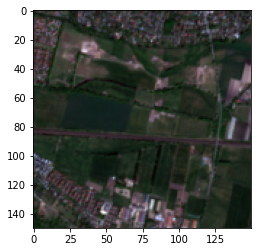

In [64]:
img_cut = img_rgb_arr[7000:7150, 7600:7750].copy()
print(img_cut.shape)
img_cut_norm = normalize_by_layer(img_cut)
print(img_cut_norm.shape)

plt.imshow(img_cut_norm)
plt.show()